In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.matplotlib.style.use('default')

In [5]:
df = pd.read_csv("data/protein_sequences_metadata.tsv", sep="\t")
# Print column names
print(df.columns)
# Print sample number
print(len(df))
# first sample
print(df.iloc[0])
# probert

Index(['aliquot_id', 'transcript_id', 'mutated_protein', 'wildtype_protein',
       'wgs_aliquot_id', 'Cancer Type', 'Cancer Stage', 'Donor Survival Time',
       'Donor Vital Status', 'Donor Age at Diagnosis', 'Tumour Grade',
       'Donor Sex', 'Histology Abbreviation'],
      dtype='object')
80840
aliquot_id                             8fb9496e-ddb8-11e4-ad8f-5ed8e2d07381
transcript_id                                               ENST00000512632
mutated_protein           MACPALGLEALQPLQPEPPPEPAFSEAQKWIEQVTGRSFGDKDFRT...
wildtype_protein          MACPALGLEALQPLQPEPPPEPAFSEAQKWIEQVTGRSFGDKDFRT...
wgs_aliquot_id                         80ab6c08-c622-11e3-bf01-24c6515278c0
Cancer Type                                        Liver Cancer - RIKEN, JP
Cancer Stage                                                              2
Donor Survival Time                                                  1440.0
Donor Vital Status                                                 deceased
Donor Age at D

Cancer Type
Malignant Lymphoma - DE              20153
Liver Cancer - RIKEN, JP             17765
Ovarian Cancer - AU                  15435
Pancreatic Cancer - AU               11868
Renal Cell Cancer - EU                9390
Esophageal Adenocarcinoma - UK        3173
Chronic Lymphocytic Leukemia - ES     3056
Name: count, dtype: int64


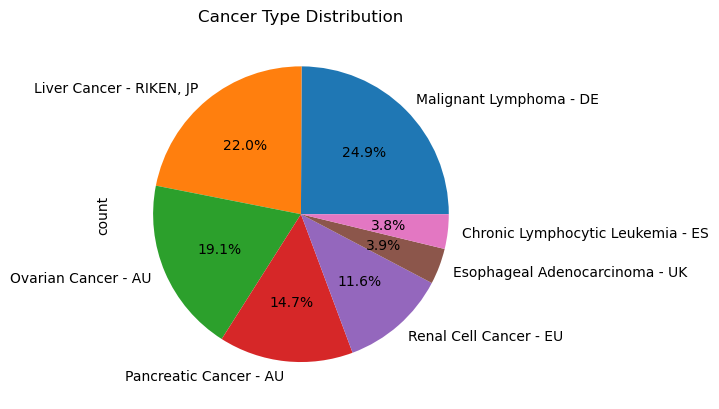

In [6]:
# Cancer Type unique values
# Cancer Type value counts
print(df['Cancer Type'].value_counts())
# Plot distribution of cancer types, pie chart with percentages on the slices showing the distribution of cancer types
df['Cancer Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Cancer Type Distribution')
plt.show()


In [7]:
# 'Histology Abbreviation' unique values
# 'Histology Abbreviation' value counts
print(df['Histology Abbreviation'].value_counts())

Histology Abbreviation
Lymph-BNHL         19867
Ovary-AdenoCA      15435
Panc-AdenoCA       11868
Liver-HCC           9734
Kidney-RCC          9390
Biliary-AdenoCA     8031
Eso-AdenoCA         3173
Lymph-CLL           3056
Lymph-NOS            286
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

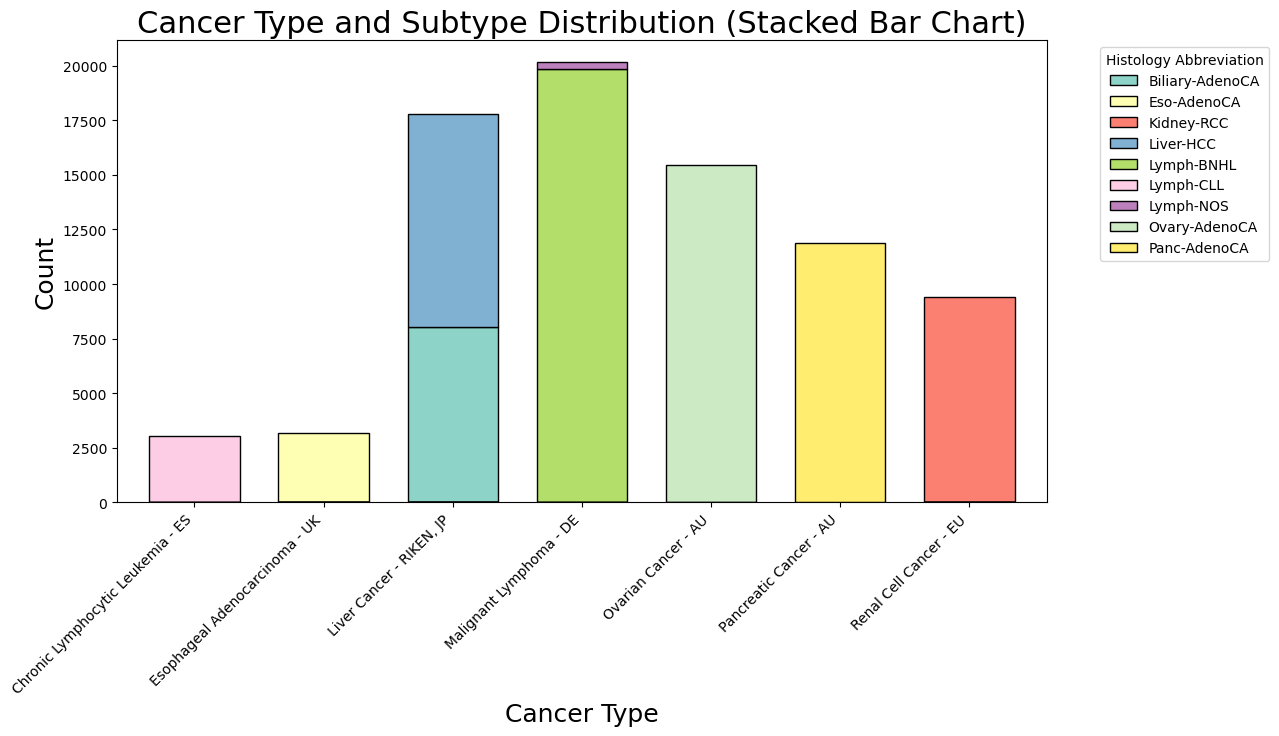

In [8]:
# 计算条形图数据（按癌症类型和亚型分组计数）
df_bar = df.groupby(["Cancer Type", "Histology Abbreviation"]).size().unstack(fill_value=0)

# 设置颜色
colors = sns.color_palette("tab10", len(df_bar.columns))

# 绘制堆叠条形图
plt.figure(figsize=(10, 6))
df_bar.plot(kind="bar", stacked=True, colormap="Set3", edgecolor="black", width=0.7, figsize=(12, 6))

# 添加标签和标题
plt.xlabel("Cancer Type", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Cancer Type and Subtype Distribution (Stacked Bar Chart)", fontsize=22)
plt.xticks(rotation=45, ha="right")  # 旋转 X 轴标签以便阅读
plt.legend(title="Histology Abbreviation", bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例放在右侧

# 显示图表
plt.show()

Mapped Cancer Stage
unknown    31338
3          27191
1          10813
2           8985
4           2513
Name: count, dtype: int64


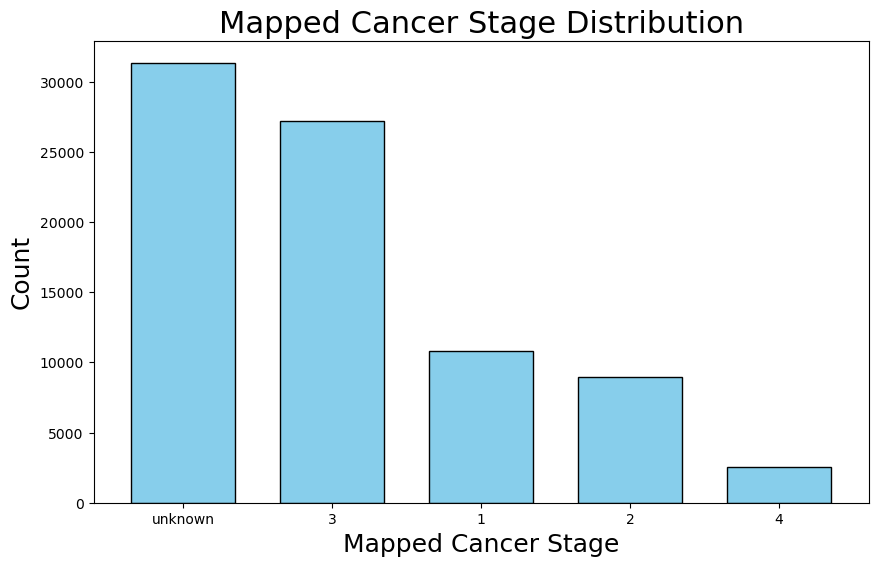

In [9]:
# Cancer Stage unique values
# print(df['Cancer Stage'].value_counts())
# 创建癌症分期映射规则
stage_mapping = {
    # I
    "I": "1", "1": "1", "1a": "1", "1b": "1", "T1aN0M0": "1", "T1bN0M0": "1", "T1bNXMX": "1", "A": "1",
    # II
    "II": "2", "2": "2", "2a": "2", "T2N0MX": "2", "T2N1MX": "2", "T2aNXMX": "2", "B": "2",
    # III
    "III": "3", "3": "3", "3b": "3", "3c": "3", "C": "3",
    "T3N0MX": "3", "T3N1MX": "3", "T3aNXMX": "3", "T3aN0MX": "3", "T3N1bMX": "3", "T3NXMX": "3",
    "T3aN0M0": "3", "T3bNXMX": "3", "T3N1aMX": "3", "T3N1M0": "3",
    # IV
    "IV": "4", "4": "4", "T4N1M1": "4", "T4N1bM1": "4", "T3N1M1": "4", "T2N1M1": "4",
    # unknown
    "unknown": "unknown"
}

# 处理未在映射表中的分类（如 A, B, C 以及其他 T/N/M 组合）
def map_cancer_stage(stage):
    return stage_mapping.get(stage, "unknown")

# 应用映射
df["Mapped Cancer Stage"] = df["Cancer Stage"].apply(map_cancer_stage).copy()

# 查看映射后的分布
print(df["Mapped Cancer Stage"].value_counts())

# 绘制癌症分期分布的条形图
plt.figure(figsize=(10, 6))
df["Mapped Cancer Stage"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black", width=0.7)
# 添加标签和标题
plt.xlabel("Mapped Cancer Stage", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Mapped Cancer Stage Distribution", fontsize=22)
plt.xticks(rotation=0)  # X 轴标签不旋转
# 显示图表
plt.show()

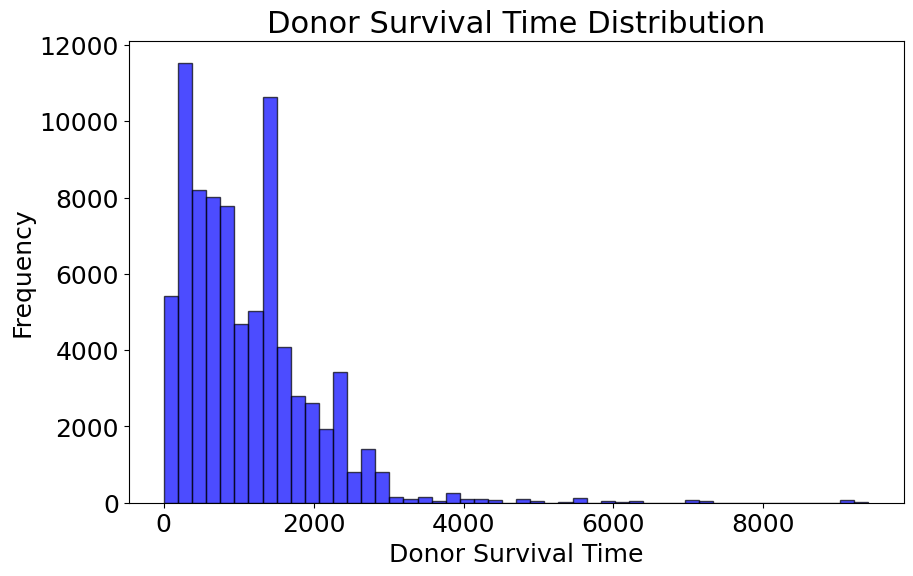

In [10]:
# Donor suvival time distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Donor Survival Time'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Donor Survival Time', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Donor Survival Time Distribution', fontsize=22)
plt.show()

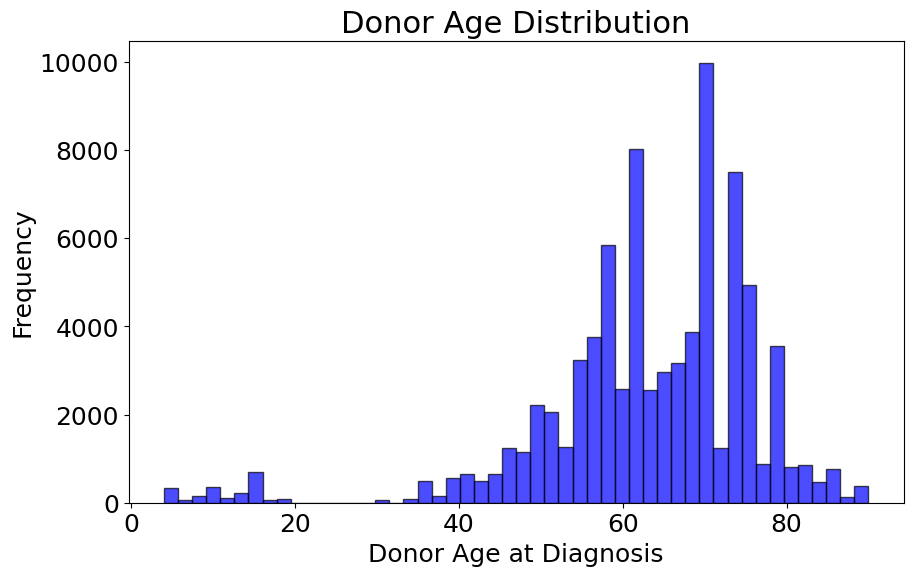

In [11]:
# Donor age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Donor Age at Diagnosis'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Donor Age at Diagnosis', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Donor Age Distribution', fontsize=22)
plt.show()

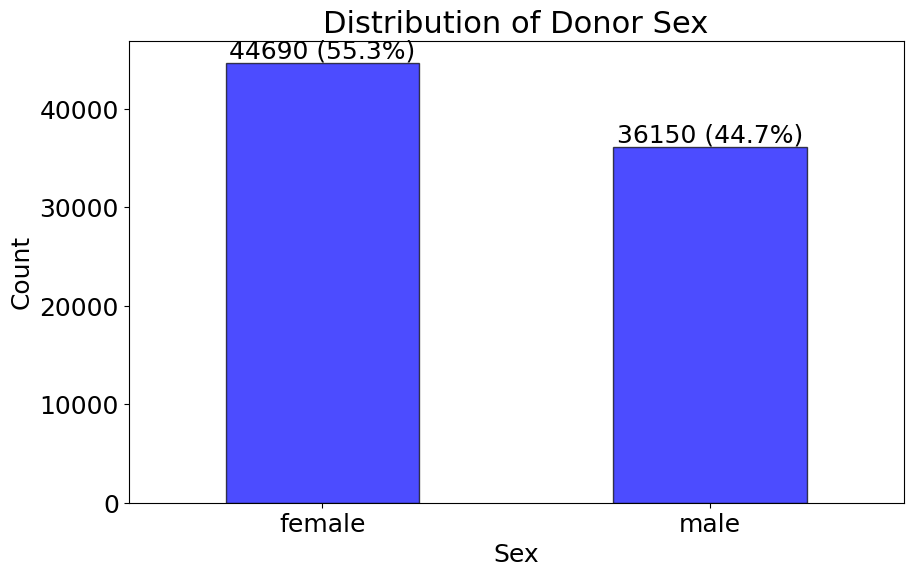

In [12]:
# Sex distribution of the samples
sex_counts = df["Donor Sex"].value_counts()
total_count = sex_counts.sum()

plt.figure(figsize=(10, 6))
bars = sex_counts.plot(kind="bar", color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Sex", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Distribution of Donor Sex", fontsize=22)
plt.xticks(rotation=0)

# 在柱状图上标注比例
for bar in bars.patches:
    height = bar.get_height()
    percentage = f'{height} ({height/total_count:.1%})'
    plt.text(bar.get_x() + bar.get_width()/2, height, percentage, ha='center', va='bottom', fontsize=18)

plt.show()